In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [10]:
df1=pd.read_csv(r"C:\Users\sanjoy\Downloads\csv\data.csv")

In [13]:
x1=df1.iloc[:13]
y1_=df1.iloc[14:]
#plt.scatter(x1,y1_,color='red')

In [14]:
c1 = 0.1  #PSO hyperparametre
c2 =0.1
P = 30   #Number of particles
N = 500 #Number of Iterations

In [15]:
def swarm(P=10):  #Define partilces
    Wpc = tf.Variable(tf.random_normal([P])) #Current value
    bpc = tf.Variable(tf.random_normal([P]))
    fitness_pc = tf.Variable(tf.zeros([P]))
    
    Wpbest= tf.Variable(tf.random_normal([P]))
    bpbest= tf.Variable(tf.random_normal([P]))
    fitness_pbest = tf.Variable(tf.zeros([P]))
    
    Wglobal= tf.Variable(tf.random_normal([1]))
    bglobal= tf.Variable(tf.random_normal([1]))
    fitness_global = tf.Variable(tf.zeros([1]))
    
    V_W = tf.Variable(tf.zeros([P]))   #Particle velocity
    V_b = tf.Variable(tf.zeros([P]))
    return Wpc,bpc,Wpbest,bpbest,Wglobal,bglobal,V_W,V_b,fitness_pc,fitness_pbest,fitness_global

Wpc,bpc,Wpbest,bpbest,Wglobal,bglobal,V_W,V_b,fitness_pc,fitness_pbest,fitness_global =swarm(P)
print(Wglobal)

<tf.Variable 'Variable_17:0' shape=(1,) dtype=float32_ref>


In [16]:
x = tf.placeholder(tf.float32)
W = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
i = tf.placeholder(tf.int32)
y_ = tf.placeholder(tf.float32)

In [17]:
#Update particles
V_W_update = V_W[i].assign(V_W[i]+(Wpbest[i] - Wpc[i])*c1*np.random.random() +(Wglobal[0] - Wpc[i])*c2*np.random.random() )
V_b_update = V_b[i].assign(V_b[i]+(bpbest[i] - bpc[i])*c1*np.random.random() +(bglobal[0] - bpc[i])*c2*np.random.random() )
Wp_update = Wpc[i].assign(V_W[i]+Wpc[i])
bp_update = bpc[i].assign(V_b[i]+bpc[i])

#Cost
y = Wpc[i]*x + bpc[i]
y_best = Wglobal[0]*x + bglobal[0]
error= tf.reduce_mean(tf.square(y- y_))
#Update fitness
update_fitness_pc = fitness_pc[i].assign(error)
update_fitness_pbest = fitness_pbest[i].assign(fitness_pc[i])
update_fitness_global = fitness_global[0].assign(fitness_pc[i])
initialize_fitness_global = fitness_global[0].assign(tf.reduce_min(fitness_pbest))

update_Wpbest = Wpbest[i].assign(Wpc[i])
update_bpbest = bpbest[i].assign(bpc[i])
update_Wglobal = Wglobal[0].assign(Wpc[i])
update_bglobal = bglobal[0].assign(bpc[i])

def f1():return [Wpbest[i].assign(Wpc[i]),bpbest[i].assign(bpc[i]),fitness_pbest[i].assign(fitness_pc[i])]
def f2():return [Wpbest[i],bpbest[i],fitness_pbest[i]]
pbest_update= tf.cond(tf.less(fitness_pc[i], fitness_pbest[i]), f1, f2)

def f3():return [Wglobal[0].assign(Wpc[i]),bglobal[0].assign(bpc[i]),fitness_global[0].assign(fitness_pc[i])]
def f4():return [Wglobal[0],bglobal[0],fitness_global[0]]
global_update= tf.cond(tf.less(fitness_pc[i], fitness_global[0]), f3, f4)

In [18]:
start_time = time.time()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    sess.run([V_W_update,V_b_update],feed_dict={i:0})
    sess.run([Wp_update,bp_update],feed_dict={i:0})
   
    for k in range(P):     #Initialize particles
        sess.run([update_fitness_pc],feed_dict={i:k,x:x1,y_:y1_})
        sess.run([update_fitness_pbest],feed_dict={i:k})
    sess.run([initialize_fitness_global])
    print("Particle fitness:",sess.run(fitness_pc))
    print("Global fitness:",sess.run(fitness_global))
    
    for j in range(N):      #Loop over N iterations
        for k in range(P):  #Loop over P particles
            
            sess.run([V_W_update,V_b_update],feed_dict={i:k})
            sess.run([Wp_update,bp_update],feed_dict={i:k})
            sess.run([update_fitness_pc],feed_dict={i:k,x:x1,y_:y1_})
            
           
            sess.run([pbest_update],feed_dict={i:k}) 
           
            sess.run([global_update],feed_dict={i:k})
                        
            
        if j%50== 0:
            print("Iteration:",j)    
    print("Particle best fitness:",sess.run(fitness_pbest)) 
    print("Global best fitness:",sess.run(fitness_global)) 
    print("Global best particle:",sess.run([Wglobal,bglobal]))  
    
    yfinal =sess.run([y_best],feed_dict={x:x1,y_:y1_}) #storing values
print("Time taken:", (time.time() - start_time))

InvalidArgumentError: Incompatible shapes: [492,14] vs. [13,14]
	 [[node sub_9 (defined at c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]

Original stack trace for 'sub_9':
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\asyncio\base_events.py", line 534, in run_forever
    self._run_once()
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\asyncio\base_events.py", line 1771, in _run_once
    handle._run()
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-22c02c41a326>", line 10, in <module>
    error= tf.reduce_mean(tf.square(y- y_))
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\ops\math_ops.py", line 899, in binary_op_wrapper
    return func(x, y, name=name)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\ops\gen_math_ops.py", line 11086, in sub
    "Sub", x=x, y=y, name=name)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "c:\users\sanjoy\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


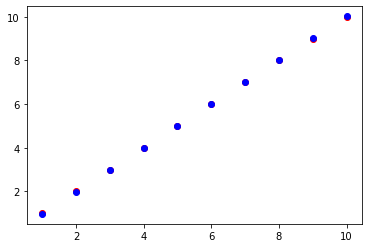

In [20]:
plt.scatter(x1,y1_,color='red')  #Plot original line
plt.scatter(x1,yfinal,color='blue')   #Plot fitted line